## **Proyek UTS IBDA3112: Northwind Traders**

Kelompok 5:
- Jason Yehezkiel Wijaya (191900531)
- Mega Berlian Bate'e (191900515)
- Moody Asyer (191900154)


### **Bab I – Pendahuluan**

**1.1 – Latar Belakang**

Database Northwind adalah database sampel, yang berisikan data penjualan untuk perusahaan fiktif bernama “Northwind Traders”, yang mengimpor dan mengekspor makanan khusus dari seluruh dunia. Database Northwind adalah contoh yang sangat baik untuk ERP bisnis kecil, dengan customers, orders, products, suppliers, shipping, dan employees.

Dataset Northwind mencakup data sampel untuk hal berikut:

- Suppliers: Pemasuk dan vendor Northwind
- Customers: Pelanggan yang membeli produk dari Northwind
- Employees: Rincian karyawan pedagang Northwind
- Products: Informasi Produk
- Shippers: Rincian Pengirim yang mengirim produk dari pedagang ke pelanggan akhir
- Orders dan Order Details: Transaksi Pesanan Penjualan yang terjadi antara pelanggan dan perusahaan

Dataset sampel Northwind mancakup 8 tabel dan hubungan tabel ditampilkan dalam diagram E-R berikut:


<p align='center'>
    <img src="images\Northwind-diagram.png" alt="Northwind E-Diagram" width="600"/>
</p>

Produk yang diperdagangkan terbagi atas 8 kategori:
Beverages, Condiments, Confections, Dairy Products. Grains/Cereals, Meat/Poultry, Produce dan Seafood. Data order yang tercatat adalah pada periode Agustus 1994 – Juni 1996.

**1.2 – Tujuan**
1. Untuk mengetahui top produk.
2. Untuk mengetahui supplier dengan total penjualan produk terbanyak/terbaik pada periode 1994-1996.
3. Untuk mengetahui customer mana yang paling banyak melakukan transaksi.
4. Untuk mengetahui top shipping.
5. Untuk mengetahui negara mana yang paling banyak mengimpor produk.


### **Bab II – Pembahasan**

Pada penugasan ini, kami diminta untuk menganalisa data dari database Northwind yang berisikan 8 tabel. Hasil analisa yang akan kami buat akan digunakan oleh perusahaan “Northwind Traders” untuk meningkatkan aktivitas bisnis seperti memperluas pasar, atau meningkatkan penjualan produk. Namun sebelum dapat melakukan analisis, kami terlebih dahulu membuat mainframe dari kedelapan tabel tersebut, sehingga akan untuk melakukan dan membuat analisa.

**2.1 – Tujuan analisa**

Tujuan dari proyek analisa “Northwind Traders’ adalah mendapatkan landasan/dasar untuk dapat menjaga loyalitas pelanggan, meningkatkan aktivitas bisnis seperti memperluas pasar, atau meningkatkan penjualan produk perusahaan “Northwind Traders”.

**2.2 – Metodologi**

Metode yang kami gunakan dalam melakukan analisa adalah Linear regression. Linear Regression  adalah alat statistik yang dipergunakan untuk mengetahui pengaruh antara satu atau beberapa fitur/variabel terhadap satu buah fitur/variabel. Variabel yang mempengaruhi sering disebut variabel bebas, variabel independen atau variabel penjelas.

**2.3 – Dataset yang digunakan**

Dataset yang digunakan pada proyek kali ini adalah dataset “Northwind” biasa yang bisa dalam bentuk .csv maupun .xlsx, namun pada proyek kali ini kami menggunakan bentuk .xlsx yang terdiri dari:
- Categories.xlsx
- Customers.xlsx
- Employees.xlsx
- Order Details.xlsx
- Orders.xlsx
- Products.xlsx
- Shippers.xlsx
- Suppliers.xlsx

**2.4 – Tools yang digunakan**

Pada proyek kali ini, tools/alat yang kami gunakan untuk melakukan analisa data “Northwind” adalah sebagai berikut.

**RapidMiner** adalah platform perangkat lunak ilmu data yang menyediakan lingkungan/environment yang terintegrasi untuk data processing, data preparation, machine learning, deep learning, text mining dan predictive analysis.

**Python** adalah bahasa pemrograman komputer yang sering digunakan untuk membangun situs web dan perangkat lunak, mengotomatisasi tugas, dan melakukan analisis data. Python adalah bahasa tujuan umum, artinya dapat digunakan untuk membuat berbagai program yang berbeda dan tidak khusus 	untuk masalah tertentu.

Dalam melakukan analisa nantinya kami akan lebih banyak menggunakan Python, karena sudah lebih familiar dengannya, sedangkan RapidMiner akan digunakan  untuk melakukan visualisasi data yang tidak dapat/lebih sulit untuk dibuat jika di Python.

panggil library yang dibutuhkan.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

pyplot.rcParams["figure.figsize"] = (12, 8)
pd.set_option("display.precision", 2)

lalu kita juga panggil dataframe yang akan digunakan, untuk membuat main table, kita memerlukan 5 dataframe yaitu Categories, Customers, Products, Order Details, dan Orders.

In [2]:
customers_df = pd.read_excel("Northwind_excel/Customers.xlsx")
prod_df = pd.read_excel("Northwind_excel/Products.xlsx")
orders_df = pd.read_excel("Northwind_excel/Orders.xlsx")
OD = pd.read_excel("Northwind_excel/Order Details.xlsx")
cat_df = pd.read_excel("Northwind_excel/Categories.xlsx")

### **Customers DataFrame**

Pada tabel customers, kami hanya membuat dataframe baru yang hanya berisikan dengan kolom Customer ID, Company Name dan Country saja dan untuk kolom lainnya dapat diabaikan.

In [3]:
customers_df.head()

,Customer ID,Company Name,Contact Name,Contact Title,Address,City,Region,Postal Code,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,NaN,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,NaN,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,NaN,05023,Mexico,(5) 555-3932,NaN
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,NaN,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,NaN,S-958 22,Sweden,0921-12 34 65,0921-12 34 67


In [4]:
customers_df.isnull().sum()

Customer ID       0
Company Name      0
Contact Name      0
Contact Title     0
Address           0
City              0
Region           60
Postal Code       1
Country           0
Phone             0
Fax              22
dtype: int64

In [5]:
new_customers_df = customers_df[['Customer ID', 'Company Name', 'Country']]

In [6]:
new_customers_df.head()

,Customer ID,Company Name,Country
0,ALFKI,Alfreds Futterkiste,Germany
1,ANATR,Ana Trujillo Emparedados y helados,Mexico
2,ANTON,Antonio Moreno Taquería,Mexico
3,AROUT,Around the Horn,UK
4,BERGS,Berglunds snabbköp,Sweden


### **Products DataFrame**

Dataframe produk ini berisikan tentang informasi dari setiap produk yang di suppy ke perusahan Northwind Traders.

Tidak ada yang harus dirubah di dalam dataframe ini, kita hanya membutuhkannya untuk match nama produk ke kategori di dataframe Order Details.

In [7]:
prod_df.shape

(77, 10)

In [8]:
prod_df.head()

,Product ID,Product Name,Supplier,Category,Quantity Per Unit,Unit Price,Units In Stock,Units On Order,Reorder Level,Discontinued
0,1,Chai,Exotic Liquids,Beverages,10 boxes x 20 bags,18.00,39,0,10,False
1,2,Chang,Exotic Liquids,Beverages,24 - 12 oz bottles,19.00,17,40,25,False
2,3,Aniseed Syrup,Exotic Liquids,Condiments,12 - 550 ml bottles,10.00,13,70,25,False
3,4,Chef Anton's Cajun Seasoning,New Orleans Cajun Delights,Condiments,48 - 6 oz jars,22.00,53,0,0,False
4,5,Chef Anton's Gumbo Mix,New Orleans Cajun Delights,Condiments,36 boxes,21.35,0,0,0,True


### **Categories DataFrame**

Dataframe ini berisikan tentang kategori produk yang diperdagangkan, akan sangat berguna untuk melakukan pembuatan *Main Table*.

Namun sebelumnya buang terlebih dahulu kolom pictures, karena tidak ada isinya.

In [9]:
cat_df.shape

(8, 4)

In [10]:
cat_df.drop(cat_df.columns[-1], axis=1, inplace=True)

In [11]:
cat_df

,Category ID,Category Name,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


### **Order Details DataFrame**

Data di dalam Order Details berisikan informasi pembelian produk untuk setiap customer yang ada di dalam jangka periode data, dataframe ini juga berisikan dengan data harga, kuantitas pembelian barang dan diskon yang diberikan.

In [12]:
OD.shape

(2155, 5)

In [13]:
OD.head()

,Order ID,Product,Unit Price,Quantity,Discount
0,10248,Queso Cabrales,14.0,12,0.0
1,10248,Singaporean Hokkien Fried Mee,9.8,10,0.0
2,10248,Mozzarella di Giovanni,34.8,5,0.0
3,10249,Tofu,18.6,9,0.0
4,10249,Manjimup Dried Apples,42.4,40,0.0


In [14]:
OD['Category'] = OD.Product.map(prod_df.set_index('Product Name')['Category'].to_dict())

In [15]:
OD.head()

,Order ID,Product,Unit Price,Quantity,Discount,Category
0,10248,Queso Cabrales,14.0,12,0.0,Dairy Products
1,10248,Singaporean Hokkien Fried Mee,9.8,10,0.0,Grains/Cereals
2,10248,Mozzarella di Giovanni,34.8,5,0.0,Dairy Products
3,10249,Tofu,18.6,9,0.0,Produce
4,10249,Manjimup Dried Apples,42.4,40,0.0,Produce


In [16]:
OD['Total Sales'] = OD['Unit Price'] * OD['Quantity']

In [17]:
OD['Total Adjusted'] = OD['Total Sales'] - (OD['Discount'] * OD['Total Sales'])

In [18]:
OD.head()

,Order ID,Product,Unit Price,Quantity,Discount,Category,Total Sales,Total Adjusted
0,10248,Queso Cabrales,14.0,12,0.0,Dairy Products,168.0,168.0
1,10248,Singaporean Hokkien Fried Mee,9.8,10,0.0,Grains/Cereals,98.0,98.0
2,10248,Mozzarella di Giovanni,34.8,5,0.0,Dairy Products,174.0,174.0
3,10249,Tofu,18.6,9,0.0,Produce,167.4,167.4
4,10249,Manjimup Dried Apples,42.4,40,0.0,Produce,1696.0,1696.0


In [19]:
new_OD = OD[['Order ID', 'Product', 'Category', 'Total Adjusted']]

### **Orders DataFrame**

Data ini berisikan tentang informasi kustomer yang membeli produk melalui Northwind Traders, baik dari nama customer, order id, tanggal pembelian, dan lain-lainnya.

Data ini yang akan kita ubah menjadi "the new main table".

In [20]:
orders_df.shape

(830, 14)

In [21]:
orders_df.head()

,Order ID,Customer,Employee,Order Date,Required Date,Shipped Date,Ship Via,Freight,Ship Name,Ship Address,Ship City,Ship Region,Ship Postal Code,Ship Country
0,10248,Vins et alcools Chevalier,"Buchanan, Steven",1994-08-04,1994-09-01,1994-08-16,Federal Shipping,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,Toms Spezialitäten,"Suyama, Michael",1994-08-05,1994-09-16,1994-08-10,Speedy Express,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,NaN,44087,Germany
2,10250,Hanari Carnes,"Peacock, Margaret",1994-08-08,1994-09-05,1994-08-12,United Package,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,Victuailles en stock,"Leverling, Janet",1994-08-08,1994-09-05,1994-08-15,Speedy Express,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,Suprêmes délices,"Peacock, Margaret",1994-08-09,1994-09-06,1994-08-11,United Package,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium


In [22]:
new_ODF = orders_df[['Order ID','Customer', 'Order Date', 'Ship Via']]

In [23]:
new_ODF.head()

,Order ID,Customer,Order Date,Ship Via
0,10248,Vins et alcools Chevalier,1994-08-04,Federal Shipping
1,10249,Toms Spezialitäten,1994-08-05,Speedy Express
2,10250,Hanari Carnes,1994-08-08,United Package
3,10251,Victuailles en stock,1994-08-08,Speedy Express
4,10252,Suprêmes délices,1994-08-09,United Package


code di bawah digunakan untuk menggabungkan data Orders dengan data Order Details sesuai dengan kolom Order ID-nya

In [24]:
new_ODF = new_ODF.set_index('Order ID').combine_first(new_OD.set_index('Order ID')).reset_index()

In [25]:
new_ODF.head()

,Order ID,Category,Customer,Order Date,Product,Ship Via,Total Adjusted
0,10248,Dairy Products,Vins et alcools Chevalier,1994-08-04,Queso Cabrales,Federal Shipping,168.0
1,10248,Grains/Cereals,Vins et alcools Chevalier,1994-08-04,Singaporean Hokkien Fried Mee,Federal Shipping,98.0
2,10248,Dairy Products,Vins et alcools Chevalier,1994-08-04,Mozzarella di Giovanni,Federal Shipping,174.0
3,10249,Produce,Toms Spezialitäten,1994-08-05,Tofu,Speedy Express,167.4
4,10249,Produce,Toms Spezialitäten,1994-08-05,Manjimup Dried Apples,Speedy Express,1696.0


Semua kode yang dibawah digunakan untuk *mapping* data yang ada di tabel lain ke dalam data *Main Table*.

In [26]:
new_ODF['Customer ID'] = new_ODF.Customer.map(customers_df.set_index('Company Name')['Customer ID'].to_dict())

In [27]:
new_ODF['Country'] = new_ODF.Customer.map(customers_df.set_index('Company Name')['Country'].to_dict())

In [28]:
new_ODF['Supplier'] = new_ODF.Product.map(prod_df.set_index('Product Name')['Supplier'].to_dict())

In [29]:
new_ODF.head()

,Order ID,Category,Customer,Order Date,Product,Ship Via,Total Adjusted,Customer ID,Country,Supplier
0,10248,Dairy Products,Vins et alcools Chevalier,1994-08-04,Queso Cabrales,Federal Shipping,168.0,VINET,France,Cooperativa de Quesos 'Las Cabras'
1,10248,Grains/Cereals,Vins et alcools Chevalier,1994-08-04,Singaporean Hokkien Fried Mee,Federal Shipping,98.0,VINET,France,Leka Trading
2,10248,Dairy Products,Vins et alcools Chevalier,1994-08-04,Mozzarella di Giovanni,Federal Shipping,174.0,VINET,France,Formaggi Fortini s.r.l.
3,10249,Produce,Toms Spezialitäten,1994-08-05,Tofu,Speedy Express,167.4,TOMSP,Germany,Mayumi's
4,10249,Produce,Toms Spezialitäten,1994-08-05,Manjimup Dried Apples,Speedy Express,1696.0,TOMSP,Germany,"G'day, Mate"


Lalu, kita lakukan rearrange kolom sesuai dengan yang diinginkan agar lebih rapi.

In [30]:
arrange_cols = ['Order ID', 'Customer', 'Customer ID', 'Order Date', 'Product',
                'Category', 'Supplier', 'Ship Via', 'Country', 'Total Adjusted']

new_ODF = new_ODF[arrange_cols]

In [31]:
new_ODF.head()

,Order ID,Customer,Customer ID,Order Date,Product,Category,Supplier,Ship Via,Country,Total Adjusted
0,10248,Vins et alcools Chevalier,VINET,1994-08-04,Queso Cabrales,Dairy Products,Cooperativa de Quesos 'Las Cabras',Federal Shipping,France,168.0
1,10248,Vins et alcools Chevalier,VINET,1994-08-04,Singaporean Hokkien Fried Mee,Grains/Cereals,Leka Trading,Federal Shipping,France,98.0
2,10248,Vins et alcools Chevalier,VINET,1994-08-04,Mozzarella di Giovanni,Dairy Products,Formaggi Fortini s.r.l.,Federal Shipping,France,174.0
3,10249,Toms Spezialitäten,TOMSP,1994-08-05,Tofu,Produce,Mayumi's,Speedy Express,Germany,167.4
4,10249,Toms Spezialitäten,TOMSP,1994-08-05,Manjimup Dried Apples,Produce,"G'day, Mate",Speedy Express,Germany,1696.0


### **Pertanyaan**

#### **Pertanyaan 1: Produk Mana yang mencatatkan volume total penjualan tertinggi tiap tahun selama 3 tahun (1994-1996)? Berapakah perkiraan penjualaannya pada tahun 1997-2000?**

disini kita akan mengelompokkan Produk berdasarkan jumlah sales-nya tiap tahun dan bulan.

In [32]:
dat = new_ODF.copy()
dat = dat[['Order Date', 'Product', 'Total Adjusted']]

dat['Order Date'] = pd.to_datetime(dat['Order Date'],format='%Y', errors='coerce').dt.to_period('y')

In [33]:
df = dat.groupby(by=['Order Date', 'Product'], sort=False, as_index=False)['Total Adjusted'].sum()

In [34]:
grouped_df = df.groupby(by=['Order Date'], sort=False, as_index=False)['Total Adjusted'].max()

In [35]:
grouped_df['Product'] = grouped_df['Total Adjusted'].map(df.set_index('Total Adjusted')['Product'].to_dict())

In [36]:
grouped_df = grouped_df[['Order Date', 'Product', 'Total Adjusted']]

In [37]:
grouped_df

,Order Date,Product,Total Adjusted
0,1994,Côte de Blaye,18550.40
1,1995,Côte de Blaye,51569.58
2,1996,Côte de Blaye,71276.75


In [38]:
dat1 = new_ODF.copy()
dat1 = dat1[['Order Date', 'Product', 'Total Adjusted']]

dat1['Order Date'] = pd.to_datetime(dat1['Order Date'],format='%m%Y', errors='coerce').dt.to_period('m')

In [39]:
df1 = dat1.groupby(by=['Order Date', 'Product'], sort=False, as_index=False)['Total Adjusted'].sum()

In [40]:
cote_blaye = df1.loc[df1['Product'] == 'Côte de Blaye'].reset_index(drop=True)

In [41]:
cote_blaye

,Order Date,Product,Total Adjusted
0,1994-11,Côte de Blaye,4005.20
1,1994-12,Côte de Blaye,14545.20
2,1995-01,Côte de Blaye,6324.00
3,1995-02,Côte de Blaye,18803.36
4,1995-04,Côte de Blaye,6324.00
5,1995-05,Côte de Blaye,3952.50
6,1995-06,Côte de Blaye,8853.60
7,1995-08,Côte de Blaye,3754.88
8,1995-10,Côte de Blaye,3557.25
9,1996-01,Côte de Blaye,3952.50


Kode dibawah digunakan untuk menambahkan row yang berisikan dengan data yang sesuai untuk setiap bulan.

In [42]:
month_3 = pd.DataFrame({"Order Date": pd.Period('1995-03'), "Product": 'Côte de Blaye', "Total Adjusted": 0}, index=[4])
df2 = pd.concat([cote_blaye.iloc[:4], month_3, cote_blaye.iloc[4:]]).reset_index(drop=True)

month_7 = pd.DataFrame({"Order Date": pd.Period('1995-07'), "Product": 'Côte de Blaye', "Total Adjusted": 0}, index=[8])
df2 = pd.concat([df2.iloc[:8], month_7, df2.iloc[8:]]).reset_index(drop=True)

month_9 = pd.DataFrame({"Order Date": pd.Period('1995-09'), "Product": 'Côte de Blaye', "Total Adjusted": 0}, index=[10])
df2 = pd.concat([df2.iloc[:10], month_9, df2.iloc[10:]]).reset_index(drop=True)

month_11 = pd.DataFrame({"Order Date": pd.Period('1995-11'), "Product": 'Côte de Blaye', "Total Adjusted": 0}, index=[12])
df2 = pd.concat([df2.iloc[:12], month_11, df2.iloc[12:]]).reset_index(drop=True)

month_12 = pd.DataFrame({"Order Date": pd.Period('1995-12'), "Product": 'Côte de Blaye', "Total Adjusted": 0}, index=[13])
df2 = pd.concat([df2.iloc[:13], month_12, df2.iloc[13:]]).reset_index(drop=True)

In [43]:
df2

,Order Date,Product,Total Adjusted
0,1994-11,Côte de Blaye,4005.20
1,1994-12,Côte de Blaye,14545.20
2,1995-01,Côte de Blaye,6324.00
3,1995-02,Côte de Blaye,18803.36
4,1995-03,Côte de Blaye,0.00
5,1995-04,Côte de Blaye,6324.00
6,1995-05,Côte de Blaye,3952.50
7,1995-06,Côte de Blaye,8853.60
8,1995-07,Côte de Blaye,0.00
9,1995-08,Côte de Blaye,3754.88


In [44]:
df2['Order Date'] = df2['Order Date'].astype(str)

In [45]:
def create_regplot(data_x, data_y, title):

    _, ax = pyplot.subplots()

    ax.bar(data_x, data_y, color="lightblue", zorder=0)
    sns.regplot(x=np.arange(0, len(data_x)), y=data_y, ax=ax)
    ax.set_ylim(0, None)
    pyplot.xticks(rotation=45)
    pyplot.title(title)
    pyplot.show()

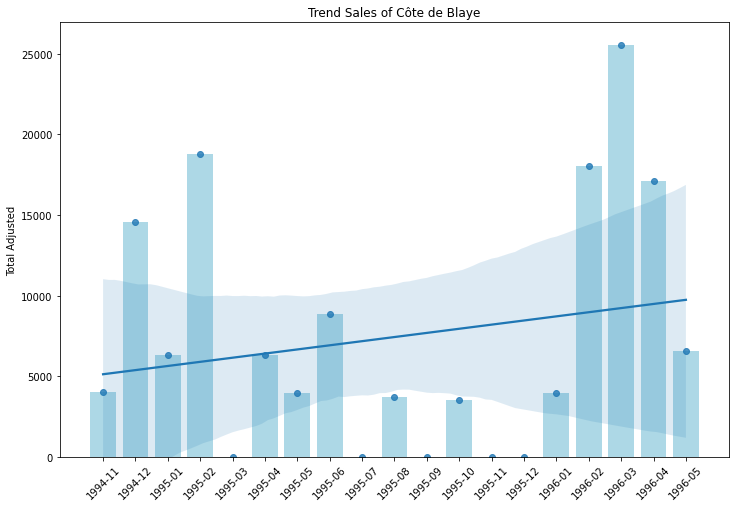

In [46]:
create_regplot(df2['Order Date'], df2['Total Adjusted'], 'Trend Sales of Côte de Blaye')

Function di bawah ini, digunakan untuk membuat estimasi untuk bulan 7 sampai 12 pada tahun 1996.

In [47]:
def create_estimate_using_slope(total_adjusted):
    # fit the attribute total adjusted to lr model
    lr = LinearRegression()
    x = np.arange(1, len(total_adjusted) + 1)
    lr.fit(x.reshape(-1,1), total_adjusted)

    # assign m and b for the slope
    m = lr.coef_[0]
    b = lr.intercept_

    # create a dataframe
    monthLists = ['1996-05', '1996-07', '1996-08', '1996-09', 
                  '1996-10', '1996-11', '1996-12']
    df = pd.DataFrame(data=monthLists, index=np.arange(20, 27), columns=["Order Date"])

    # operator to create the prediction column
    df['Total Adjusted'] = m * df.index + b

    return df

In [48]:
data = create_estimate_using_slope(df2['Total Adjusted'])

In [49]:
df3 = pd.concat([df2, data])
# fill missing values with product's name
df3 = df3.fillna('Côte de Blaye')

In [50]:
df3.head()

,Order Date,Product,Total Adjusted
0,1994-11,Côte de Blaye,4005.20
1,1994-12,Côte de Blaye,14545.20
2,1995-01,Côte de Blaye,6324.00
3,1995-02,Côte de Blaye,18803.36
4,1995-03,Côte de Blaye,0.00


In [51]:
df3['Order Date'] = pd.to_datetime(df3['Order Date'],format='%Y-%m', errors='coerce').dt.to_period('y')

In [52]:
df3.head()

,Order Date,Product,Total Adjusted
0,1994,Côte de Blaye,4005.20
1,1994,Côte de Blaye,14545.20
2,1995,Côte de Blaye,6324.00
3,1995,Côte de Blaye,18803.36
4,1995,Côte de Blaye,0.00


In [53]:
grouped_df1 = df3.groupby(by=['Order Date', 'Product'], sort=False, as_index=False)['Total Adjusted'].sum()

In [54]:
grouped_df1

,Order Date,Product,Total Adjusted
0,1994,Côte de Blaye,18550.40
1,1995,Côte de Blaye,51569.58
2,1996,Côte de Blaye,146685.80


**Note**: kita akan tidak melakukan backward prediction (u/ tahun 1994), dikarenakan kita tidak dapat melakukan hal tersebut, namun jika dilihat dari nilai bulan 11 dan 12 saja, maka kita sudah bisa mengestimasi bahwa nilai pada tahun 1994 berkisar antara 20-40 ribu US dollar.

function dibawah ini membuat sales projection untuk produk `Côte de Blaye` tiap tahunnya.

In [55]:
def estimate_projection(total_adjusted, title):
    # fit the attribute total adjusted to lr model
    lr = LinearRegression()
    x = np.arange(1, len(total_adjusted) + 1)
    lr.fit(x.reshape(-1,1), total_adjusted)

    # assign m and b for the slope
    m = lr.coef_[0]
    b = lr.intercept_

    # create a dataframe 
    df = pd.DataFrame(data=np.arange(3, 7))

    # operator to create the prediction column
    df[1] = m * df[0] + b

    # create a list containing name of months
    yearLists = ['1997', '1998', '1999', '2000']

    # plot the data
    pyplot.bar(df[0], df[1], color="lightblue", zorder=0)
    pyplot.xticks(df[0], yearLists, rotation=45)
    pyplot.title(title)
    pyplot.show()

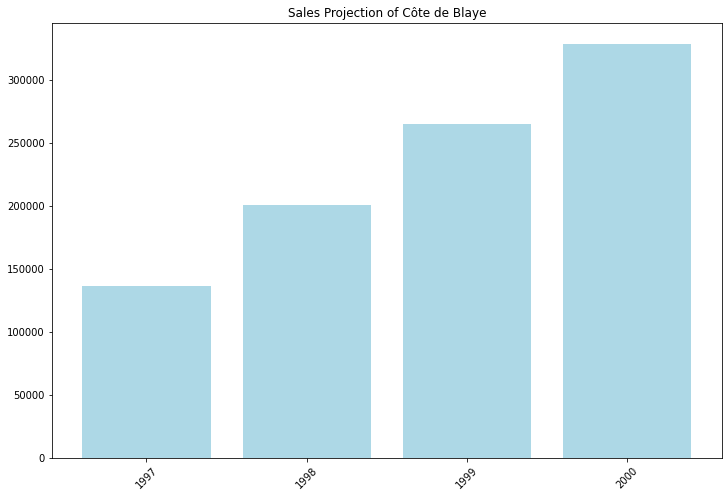

In [56]:
estimate_projection(grouped_df1['Total Adjusted'], 'Sales Projection of Côte de Blaye')

#### **Pertanyaan 2: Produk mana yang mencatatkan rata-rata volume penjualan tertinggi tiap bulan selama 3 tahun (1994-1996)?**

disini, kita akan melakukan hal yang sama seperti diatas, namun hanya melakukan *groupping* untuk setiap bulannya.

In [57]:
dat2 = new_ODF.copy()
dat2= dat2[['Order Date', 'Product', 'Total Adjusted']]

dat2['Order Date'] = dat2['Order Date'].dt.to_period('m')

In [58]:
df4 = dat2.groupby(by=['Order Date', 'Product'], sort=False, as_index=False)['Total Adjusted'].sum()

In [59]:
grouped_df2 = df4.groupby(by=['Order Date'], sort=False, as_index=False)['Total Adjusted'].max()

In [60]:
grouped_df2['Product'] = grouped_df2['Total Adjusted'].map(df4.set_index('Total Adjusted')['Product'].to_dict())

In [61]:
grouped_df2 = grouped_df2[['Order Date', 'Product', 'Total Adjusted']]

**Note**: Code dibawah dapat diubah untuk melihat produk yang paling banyak penjualannya tiap bulan.

In [62]:
grouped_df2.head()

,Order Date,Product,Total Adjusted
0,1994-08,Raclette Courdavault,3938.0
1,1994-09,Tarte au sucre,2048.8
2,1994-10,Tarte au sucre,4826.5
3,1994-11,Côte de Blaye,4005.2
4,1994-12,Côte de Blaye,14545.2


In [63]:
grouped_df2['Product'].value_counts().rename_axis('Products').reset_index(name='Counts')

,Products,Counts
0,Côte de Blaye,9
1,Raclette Courdavault,5
2,Thüringer Rostbratwurst,2
3,Manjimup Dried Apples,2
4,Tarte au sucre,2
5,Gnocchi di nonna Alice,1
6,Carnarvon Tigers,1
7,Wimmers gute Semmelknödel,1


In [64]:
grouped_df2.groupby(by=['Product'], sort=False, as_index=False)['Total Adjusted'].sum().sort_values('Total Adjusted', ascending=False, ignore_index=True).head(7)

,Product,Total Adjusted
0,Côte de Blaye,119592.11
1,Raclette Courdavault,33525.25
2,Manjimup Dried Apples,13912.50
3,Thüringer Rostbratwurst,12057.15
4,Tarte au sucre,6875.30
5,Gnocchi di nonna Alice,5517.60
6,Carnarvon Tigers,5100.00


#### **Pertanyaan 3: Supplier mana yang memasok produk dalam pertanyaan pertama?**

dari pertanyaan, berarti hanya akan melihat suplier mana yang memasok produk `Côte de Blaye`.

In [65]:
prod_df.loc[prod_df['Product Name'] == 'Côte de Blaye']['Supplier'].to_string(index=False)

'Aux joyeux ecclésiastiques'

#### **Pertanyaan 4: Supplier mana yang total nilai pasokannya tertinggi setiap tahun selama 3 tahun (1994-1996)?**

Disini, kita melihat supplier mana yang menghasilkan jumlah penjualan terbanyak setiap tahunnya, kita mendapatkan *Aux joyeux ecclésiastiques* sebagai supplier dengan penjualan terbanyak setiap tahunnya, namun untuk tahun 1995 supplier *Plutzer Lebensmittelgroßmärkte AG* lah yang menjadi supplier dengan total penjualan terbanyak.

In [66]:
dat3 = new_ODF.copy()
dat3 = dat3[['Order Date', 'Supplier', 'Total Adjusted']]

dat3['Order Date'] = dat3['Order Date'].dt.to_period('y')

In [67]:
df5 = dat3.groupby(by=['Order Date', 'Supplier'], sort=False, as_index=False)['Total Adjusted'].sum()

In [68]:
grouped_df3 = df5.groupby(by=['Order Date'], sort=False, as_index=False)['Total Adjusted'].max()

In [69]:
grouped_df3['Supplier'] = grouped_df3['Total Adjusted'].map(df5.set_index('Total Adjusted')['Supplier'].to_dict())

In [70]:
grouped_df3 = grouped_df3[['Order Date', 'Supplier', 'Total Adjusted']]

In [71]:
grouped_df3

,Order Date,Supplier,Total Adjusted
0,1994,Aux joyeux ecclésiastiques,21863.84
1,1995,Plutzer Lebensmittelgroßmärkte AG,60035.61
2,1996,Aux joyeux ecclésiastiques,77961.95


#### **Pertanyaan 5: Kategori Produk mana yang mencatatkan volume dan total penjualan tertinggi di dalam 3 tahun (1994-1996)?**

kita ingin melihat kategori produk apa yang paling banyak mencatat total penjualan, sehingga kita dapat memberikan rekomendasi produk-produk apa saja yang harus/lebih baik menjadi fokus perusahaan sesuai dengan kategori produknya.

In [72]:
dat4 = new_ODF.copy()
dat4 = dat4[['Order Date', 'Category', 'Total Adjusted']]

dat4['Order Date'] = dat4['Order Date'].dt.to_period('m')

In [73]:
df6 = dat4.groupby(by=['Order Date', 'Category'], sort=False, as_index=False)['Total Adjusted'].sum()

In [74]:
dict_of_dataframes = {k: v for k, v in df6.groupby('Category')}

In [75]:
data_beverages = dict_of_dataframes['Beverages']
data_condiments = dict_of_dataframes['Condiments']
data_confections = dict_of_dataframes['Confections']
data_dairy = dict_of_dataframes['Dairy Products']
data_grains = dict_of_dataframes['Grains/Cereals']
data_meat = dict_of_dataframes['Meat/Poultry']
data_produce = dict_of_dataframes['Produce']
data_seafood = dict_of_dataframes['Seafood']

In [76]:
data_beverages['Order Date'] = data_beverages['Order Date'].astype(str)
data_condiments['Order Date'] = data_condiments['Order Date'].astype(str)
data_confections['Order Date'] = data_confections['Order Date'].astype(str)
data_dairy['Order Date'] = data_dairy['Order Date'].astype(str)
data_grains['Order Date'] = data_grains['Order Date'].astype(str)
data_meat['Order Date'] = data_meat['Order Date'].astype(str)
data_produce['Order Date'] = data_produce['Order Date'].astype(str)
data_seafood['Order Date'] = data_seafood['Order Date'].astype(str)

Setelah melihat hasil perbulannya, didapatkan kategori produk *beverages* dan *dairy products*, sebagai kategori produk yang menghasilkan nilai penjualan terbanyak selama periode data berlangsung.

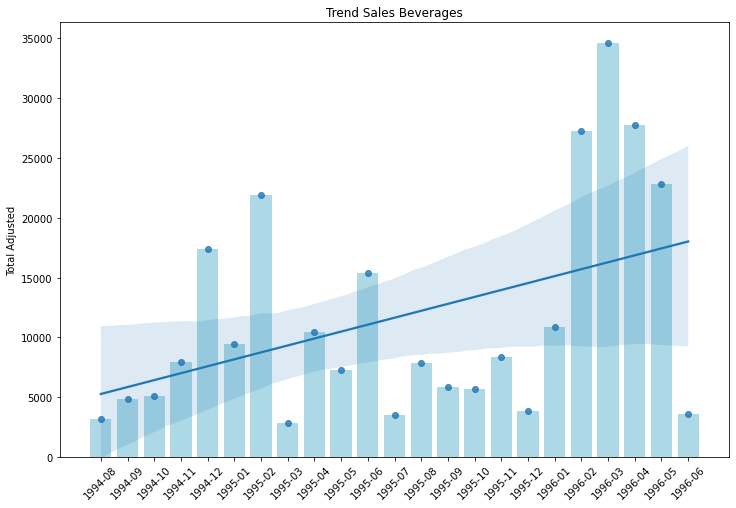

In [77]:
create_regplot(data_beverages['Order Date'], data_beverages['Total Adjusted'], 'Trend Sales Beverages')

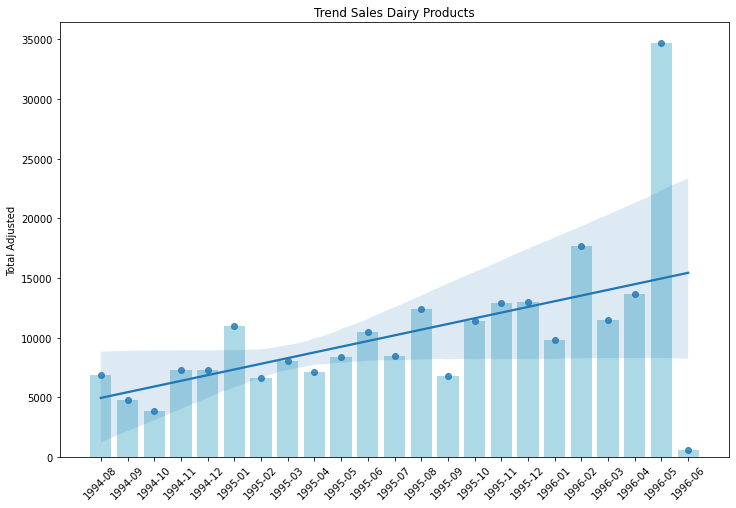

In [78]:
create_regplot(data_dairy['Order Date'], data_dairy['Total Adjusted'], 'Trend Sales Dairy Products')

#### **Pertanyaan 6: Wilayah mana yang paling banyak melakukan pembelian?**

In [79]:
new_ODF.groupby(['Country'], sort=False, as_index=False)['Total Adjusted'].sum().nlargest(10, 'Total Adjusted')

,Country,Total Adjusted
8,USA,246167.81
1,Germany,230284.63
6,Austria,128003.84
2,Brazil,106342.58
0,France,81358.32
13,UK,58971.31
5,Venezuela,56810.63
9,Sweden,54495.14
16,Canada,50196.29
14,Ireland,49979.91


In [80]:
new_ODF.groupby(['Country'], sort=False, as_index=False)['Product'].count().sort_values('Product', ascending=False).head(10)

,Country,Product
8,USA,353
1,Germany,328
2,Brazil,202
0,France,184
13,UK,135
6,Austria,125
5,Venezuela,118
9,Sweden,97
16,Canada,75
7,Mexico,72


#### **Pertanyaan 7: Apakah ada kaitan antara kategori produk dengan wilayahnya?**

kita melakukan visualisasi data ini dengan RapidMiner, filenya dapat dilihat di folder rapidminer -> rapidminer-heatmap.rmp, sedangkan untuk image-nya dapat dilihat di images -> Correlation between Country and Category.svg

<img src="images\Correlation between Country and Category.svg" alt="Correlation between Country and Category" width="600"/>

#### **Pertanyaan 8: Apakah ada perusahaan *Shipping* yang lebih dominan dari yang lain?**

Setelah melakukan analisa, kita mendapatkan bahwa dalam pembagian shipping hampir merata, namun jika dilihat dari orderannya maka *United Package* menjadi yang pertama dalam melakukan *shipping*.

In [81]:
orders_df['Ship Via'].value_counts().rename_axis('Shippers').reset_index(name='Counts')

,Shippers,Counts
0,United Package,326
1,Federal Shipping,255
2,Speedy Express,249


#### **Pertanyaan 9: Sepuluh customer yang paling sering bertransaksi?**

Disini, kita hanya ingin melihat kostumer dari perusahaan Northwind Traders, dan melihat 10 kustomer dengan jumlah transaksi terbanyak.

Selain itu, kita juga ingin melihat pembagian wilayah dan kategori, sehingga dapat membantu analisa.

In [90]:
customers = orders_df['Customer'].value_counts().rename_axis('Customers').reset_index(name='Counts').nlargest(10, 'Counts')

In [92]:
customers['Country'] = customers['Customers'].map(new_ODF.set_index('Customer')['Country'].to_dict())

In [94]:
customers = customers[['Customers', 'Country', 'Counts']]
customers

,Customers,Country,Counts
0,Save-a-lot Markets,USA,31
1,Ernst Handel,Austria,30
2,QUICK-Stop,Germany,28
3,Hungry Owl All-Night Grocers,Ireland,19
4,Folk och fä HB,Sweden,19
5,Rattlesnake Canyon Grocery,USA,18
6,Berglunds snabbköp,Sweden,18
7,HILARIÓN-Abastos,Venezuela,18
8,Bon app',France,17
9,Frankenversand,Germany,15


Transaksi dilihat dari banyaknya produk yang dibeli oleh Customer

In [96]:
new_ODF.groupby(['Customer', 'Country'], sort=False, as_index=False)['Product'].count().sort_values('Product', ascending=False, ignore_index=True).head(10)

,Customer,Country,Product
0,Save-a-lot Markets,USA,117
1,Ernst Handel,Austria,102
2,QUICK-Stop,Germany,86
3,Rattlesnake Canyon Grocery,USA,71
4,Hungry Owl All-Night Grocers,Ireland,55
5,Berglunds snabbköp,Sweden,52
6,Frankenversand,Germany,48
7,HILARIÓN-Abastos,Venezuela,45
8,Folk och fä HB,Sweden,45
9,Bon app',France,44


Melihat transaksi berdasarkan kategori produk yang digunakan dan negara tujuan.

In [83]:
new_ODF.groupby(['Category', 'Country'], sort=False, as_index=False)['Product'].count().sort_values('Product', ascending=False, ignore_index=True).head(10)

,Category,Country,Product
0,Dairy Products,Germany,65
1,Confections,USA,63
2,Beverages,USA,61
3,Beverages,Germany,60
4,Confections,Germany,55
5,Dairy Products,USA,55
6,Seafood,USA,53
7,Seafood,Germany,49
8,Beverages,Brazil,40
9,Seafood,Brazil,38


Melihat transaksi setiap kustomer berdasarkan kategori produk yang digunakan.

In [84]:
new_ODF.groupby(['Customer', 'Country', 'Category'], sort=False, as_index=False)['Product'].count().sort_values('Product', ascending=False, ignore_index=True).head(10)

,Customer,Country,Category,Product
0,Save-a-lot Markets,USA,Seafood,22
1,Save-a-lot Markets,USA,Confections,22
2,Ernst Handel,Austria,Dairy Products,21
3,Save-a-lot Markets,USA,Beverages,20
4,Save-a-lot Markets,USA,Dairy Products,19
5,QUICK-Stop,Germany,Beverages,19
6,Ernst Handel,Austria,Beverages,18
7,QUICK-Stop,Germany,Dairy Products,14
8,Berglunds snabbköp,Sweden,Beverages,13
9,Save-a-lot Markets,USA,Meat/Poultry,13


### **Bab III – Penutup**

**3.1 – Kesimpulan**

Dari hasil analisa, kami dapat menyimpulkan atau memberikan rekomendasi tentang 5 point yang telah ditelusuri:

**Product** : kami akan merekomendasikan produk dengan kategori 'Beverages' dan 'Dairy Products', karena kedua kategori memiliki jumlah penjualan yang sangat besar dan dapat membantu perusahaan Northwind Traders dalam meningkatkan pendapatan dari penjualan produknya.

**Supplier** : Untuk merealisasikan peningkatan penjualan, kami merekomendasikan  supplier yang mensupply produk-produk di kategori Beverages dan Dairy Products, Untuk produk sendiri, kami menyarankan untuk memilih 'Aux joyeux ecclésiastiques' (supplier Côte de Blaye) dan 'Gai pâturage' (supplier Raclette Courdavault), kedua supplier ini adalah supplier yang mensupply produk paling besar jumlah penjualannya di dua kategori tersebut.

**Customer** : kami merekomendasikan perusahaan 'QUICK-Stop', 'Save-a-lot Markets', dan 'Ernst Handel' sebagai customer prioritas untuk meningkat penjualan produk, hal ini setelah kami melihat pembelian dari ketiga perusahaan tersebut sesuai dengan kategori produk yang ingin kita tingkatkan.

**Shipping** : Untuk Shipping, kami tidak perlu memberikan rekomendasi, karena tidak ada perbedaan antara perusahaan shipping yang satu dengan yang lainnya.

**Wilayah Fokus** : Seperti yang telah dijelaskan diatas, kami merekomendasikan Brazil, Austria dan Perancis sebagai wilayah fokus yang baru, karena memiliki potensi di dalam pembelian produk-produk vendor Northwind Traders. Namun perusahaan juga tetap harus memiliki fokus di Jerman dan USA, disini kami merekomendasikan 3 negara tersebut bukan untuk menggantikan Jerman dan USA, namun menambahkan wilayah fokus baru untuk perusahaan.

